In [1]:
import ltspice
import matplotlib.pyplot as plt
import pandas as pd

sim_data = ltspice.Ltspice("./Buck.raw")
sim_data.parse()

t = sim_data.get_time()
iL = sim_data.get_data("I(L1)")
vC = sim_data.get_data("V(n004)")
Vsw = sim_data.get_data("V(n003)")
Vin = sim_data.get_data("V(n002)")


# データをDataFrameとしてまとめる
df: pd.DataFrame = pd.DataFrame({"t": t, "iL": iL, "vC": vC, "Vsw": Vsw, "Vin": Vin})

# CSVファイルとして保存
df.to_csv("ltspice_sim_data.csv", index=False)


In [2]:
print(f"{len(t)=}")
print(f"{len(iL)=}")
print(f"{len(vC)=}")
print(f"{len(Vsw)=}")
print(f"{len(Vin)=}")

len(t)=2042549
len(iL)=2042549
len(vC)=2042549
len(Vsw)=2042549
len(Vin)=2042549


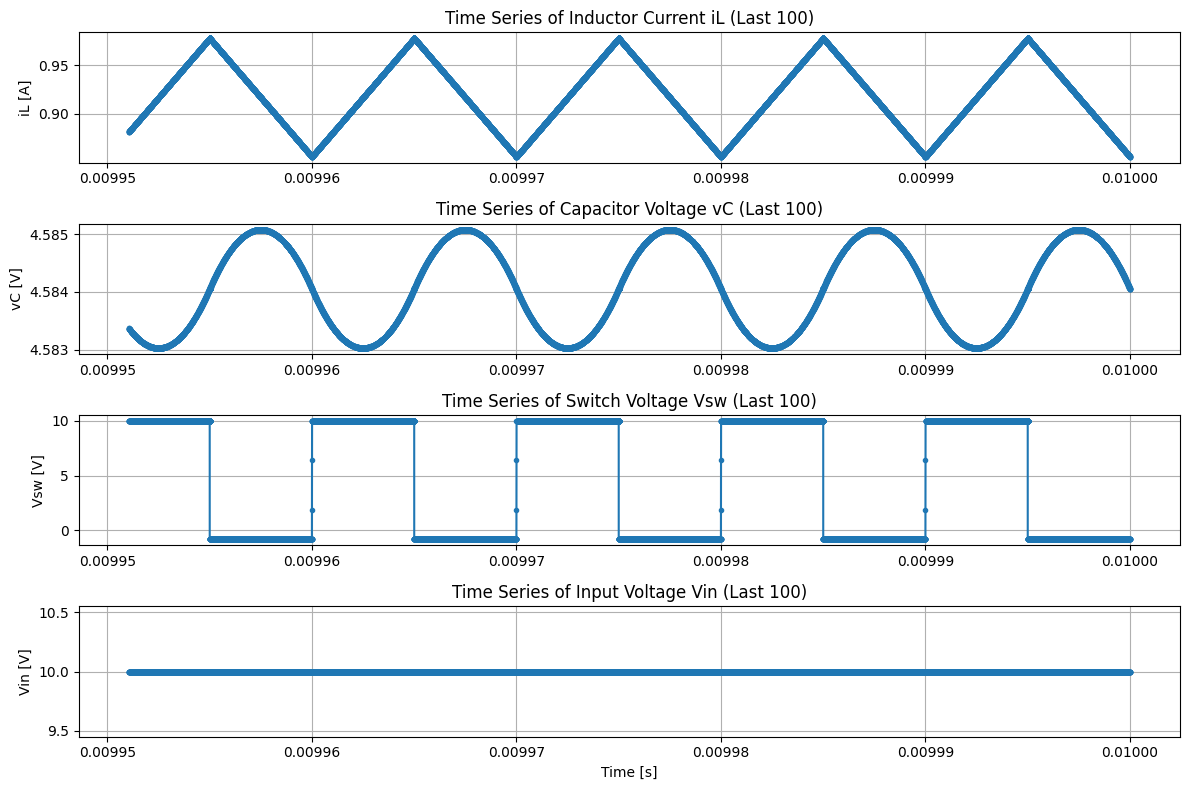

In [3]:
plt.figure(figsize=(12, 8))

# 各波形の後ろ100点だけを点と線でプロットする
last_n = 10000

t_plot = t[-last_n:]
iL_plot = iL[-last_n:]
vC_plot = vC[-last_n:]
Vsw_plot = Vsw[-last_n:]
Vin_plot = Vin[-last_n:]

# iL のプロット
plt.subplot(4, 1, 1)
plt.plot(t_plot, iL_plot, marker="o", linestyle="-", markersize=3)
plt.ylabel("iL [A]")
plt.title("Time Series of Inductor Current iL (Last 100)")
plt.grid(True)

# vC のプロット
plt.subplot(4, 1, 2)
plt.plot(t_plot, vC_plot, marker="o", linestyle="-", markersize=3)
plt.ylabel("vC [V]")
plt.title("Time Series of Capacitor Voltage vC (Last 100)")
plt.grid(True)

# Vsw のプロット
plt.subplot(4, 1, 3)
plt.plot(t_plot, Vsw_plot, marker="o", linestyle="-", markersize=3)
plt.ylabel("Vsw [V]")
plt.title("Time Series of Switch Voltage Vsw (Last 100)")
plt.grid(True)

# Vin のプロット
plt.subplot(4, 1, 4)
plt.plot(t_plot, Vin_plot, marker="o", linestyle="-", markersize=3)
plt.xlabel("Time [s]")
plt.ylabel("Vin [V]")
plt.title("Time Series of Input Voltage Vin (Last 100)")
plt.grid(True)

plt.tight_layout()
plt.show()
